In [27]:
#import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import math

In [ ]:
#import and clean dataset
pd.options.display.float_format = '{:,.2f}'.format
countries_data = pd.read_csv("raw_data/HISTPOP_16102021224139462.csv")
pop_data = countries_data.groupby(by=["Country", "Time", "Sex", "Age"]).sum().reset_index(drop=False)
pop_data = pop_data[pop_data.Age.str.contains(pat="^\w{1,2} to \w{1,4}$|85 and over|^Total$")]
Age_labels = pop_data.Age.unique().tolist()
Age_labels.insert(1, Age_labels.pop(11))
Age_labels.remove("15 to 64")
Age_labels.remove("20 to 64")
pop_data = pop_data[pop_data.Age.str.contains("|".join(Age_labels))]
pop_data.drop(columns=["TIME", "Flag Codes", "Flags"], inplace=True)
pop_data.rename({"Time": "Year", "Value": "Population"}, axis=1, inplace=True)
pop_data.sort_values(by=["Year", "Age", "Population"], inplace=True, ascending=True)
pop_data.reset_index(drop=True, inplace=True)

pop_data

[2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
 2019 2020]


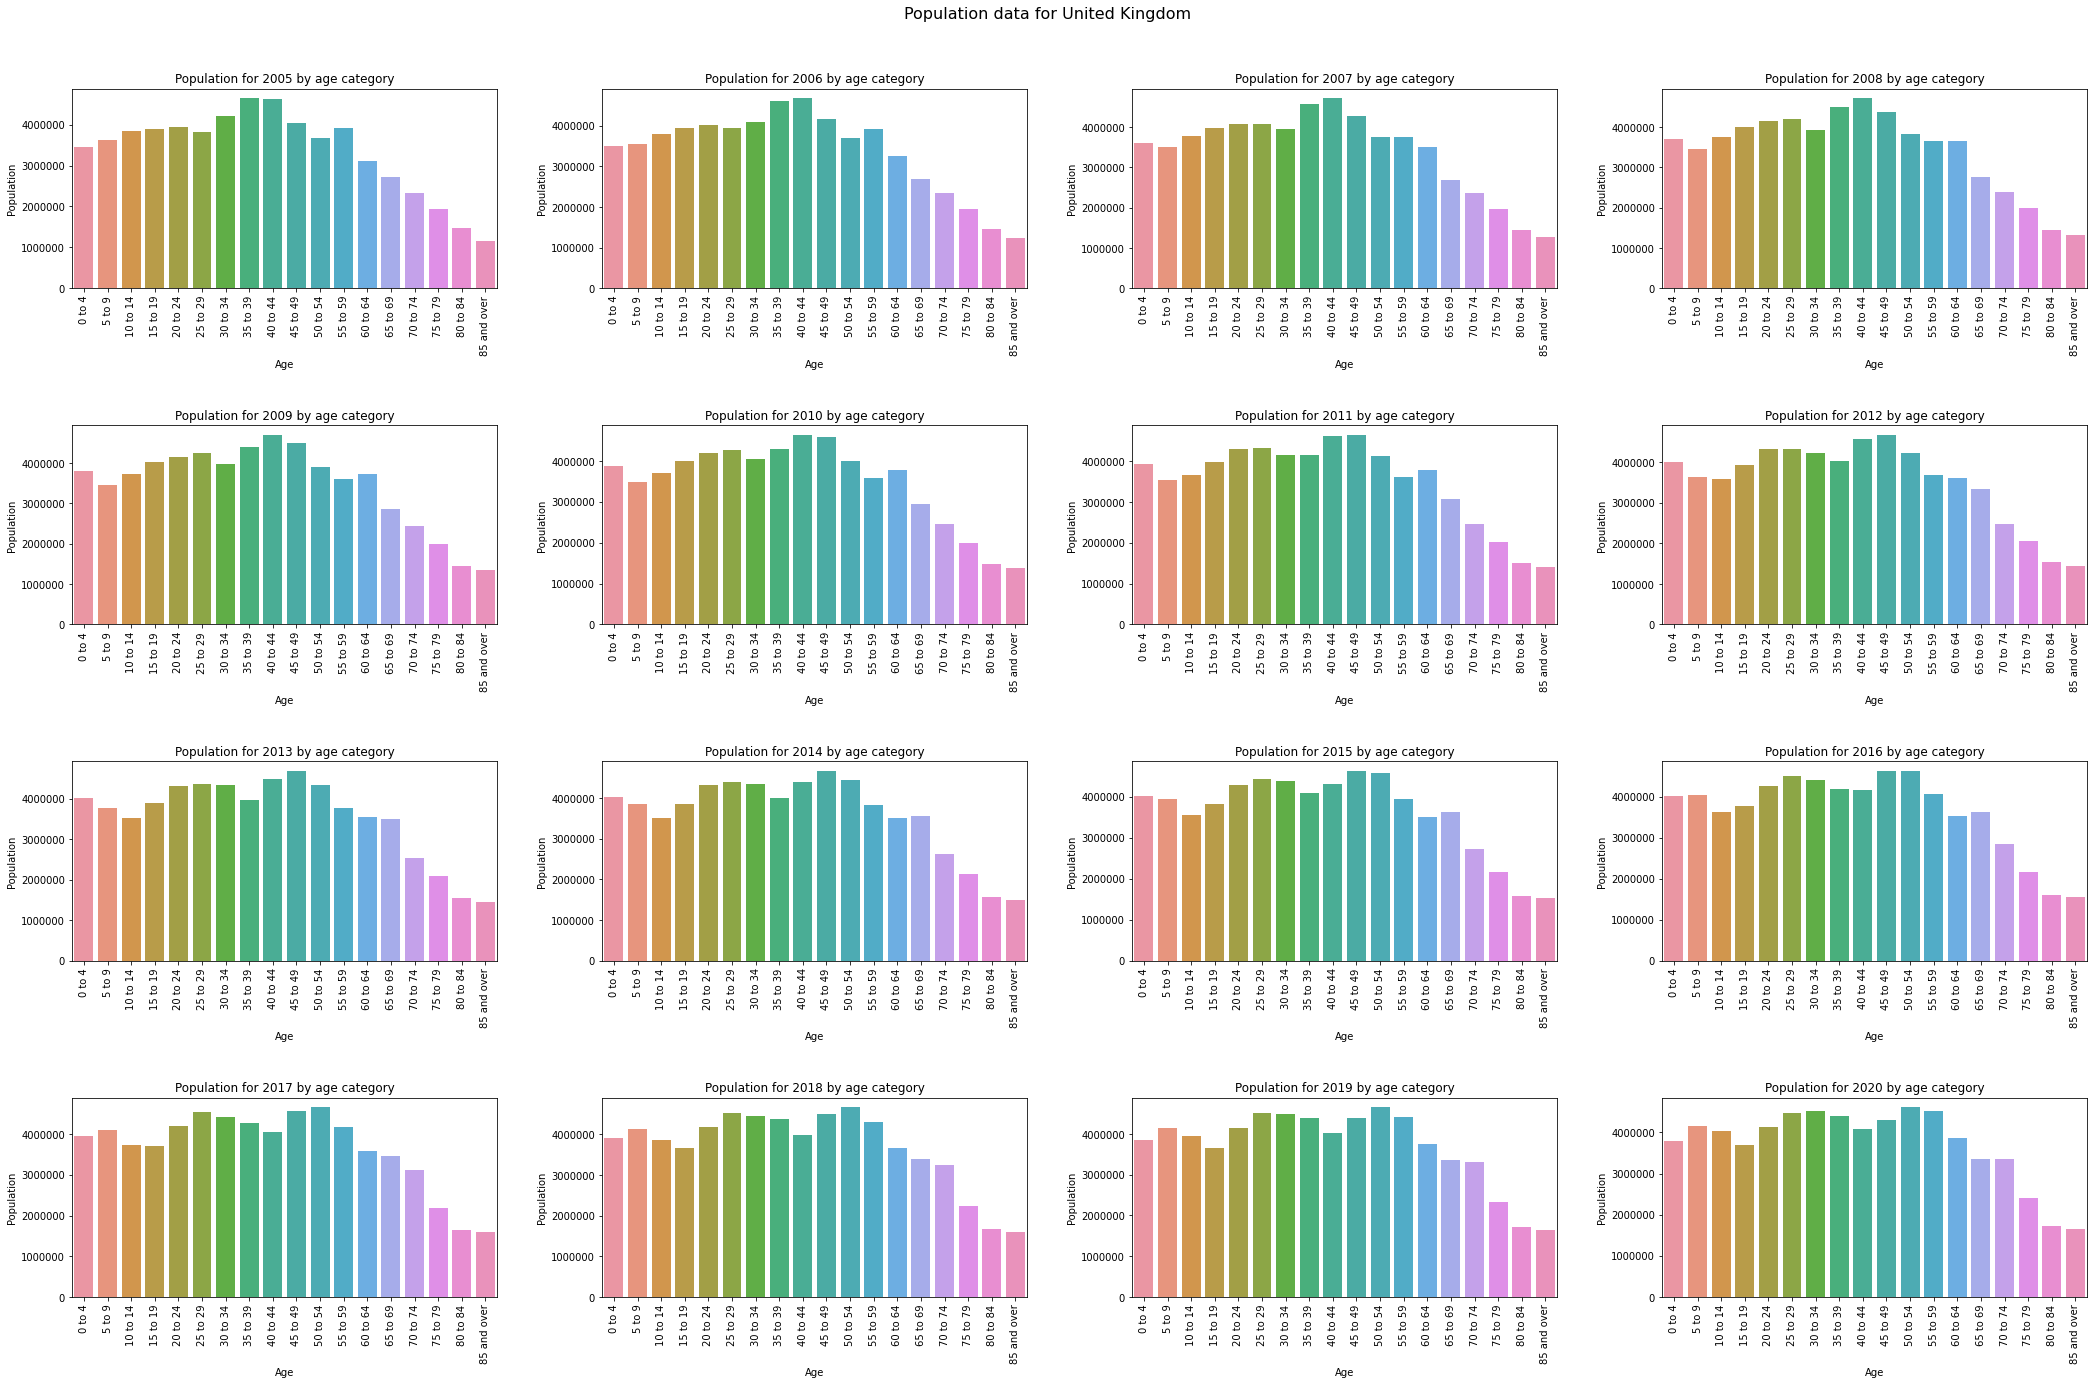

In [63]:
#create country class 

class Country():
  
  def __init__(self, name):
    self.name = name

  def country_pop_profile(self):
    country_data = pop_data[pop_data["Country"] == self.name].reset_index(drop=True)

    return country_data
  
  def chart_pop_growth(self, by_sex=False):
    fig, ax, = plt.subplots(figsize=(16,10))
    data = self.country_pop_profile()
    if by_sex == False:
      total_pop = data[(data.Sex == "Total") & (data.Age == "Total")]
      min_pop = min(data.Population[(data.Sex == "Total") & (data.Age == "Total")]) - 1000000
      max_pop = max(data.Population[(data.Sex == "Total") & (data.Age == "Total")]) + 1000000
      sns.barplot(data=total_pop, x="Year", y="Population", ax=ax)
      ax.ticklabel_format(style="plain", axis="y")
      ax.set_ylim(min_pop, max_pop)
      ax.set_title(f'{self.name} Population over time: 2005 - 2020')
    elif by_sex == True:
      sex_pop = data[data.Age == "Total"]
      sns.barplot(data=sex_pop, x="Year", y="Population", hue="Sex", ax=ax)
      ax.ticklabel_format(style="plain", axis="y")
      ax.set_title(f'{self.name} Population over time by sex: 2005 - 2020')
    

    plt.show()

  def chart_pop_by_age(self):
    data = self.country_pop_profile()
    years = data.Year.unique()
    print(years)

    fig, axs = plt.subplots(4, 4, figsize=(30,20))
    age_order = data.Age.unique().tolist()
    age_order.insert(1, age_order.pop(9))
    age_order.remove("Total")
    fig.suptitle(f"Population data for {self.name}", fontsize=16)

    for i, ax in enumerate(fig.axes):
      yr_data = data[(data["Year"] == years[i]) & (data["Sex"] == "Total") & (data["Age"] != "Total")]
      sns.barplot(data=yr_data, x="Age", y="Population", ax=ax, order=age_order)
      ax.set_title(f"Population for {years[i]} by age category")
      ax.set_xticklabels(labels=age_order, rotation=90)
      ax.ticklabel_format(style="plain", axis="y")

    plt.tight_layout(pad=4)
    plt.show()
      
  
uk = Country("United Kingdom").chart_pop_by_age()



In [ ]:
germany = Country("Germany")
uk = Country("United Kingdom")
usa = Country("United States")

usa.chart_pop_by_age()